**Data Description** : The Dataset contain 18 columns with name like

1. naffairs	   : number of affairs within last year
2. kids	       : 1=have children;0= no children
3. vryunhap    : (1/0) very unhappily married
4. unhap	     : (1/0) unhappily married
5. avgmarr	   : (1/0) average married
6. hapavg	     : (1/0) happily married
7. vryhap	     : (1/0) very happily married
8. antirel	   : (1/0) anti religious
9. notrel	     : (1/0) not religious
10. slghtrel 	 : (1/0) slightly religious
11. smerel	   : (1/0) somewhat religious
12. vryrel	   : (1/0) very religious
13. yrsmarr1	 : (1/0) >0.75 yrs
14. yrsmarr2	 : (1/0) >1.5 yrs
15. yrsmarr3	 : (1/0) >4.0 yrs
16. yrsmarr4	 : (1/0) >7.0 yrs
17. yrsmarr5   : (1/0) >10.0 yrs
18. yrsmarr6   : (1/0) >15.0 yrs



In [81]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.model_selection import cross_val_score


In [82]:
# Loading the dataset
from google.colab import files

uploaded = files.upload()

Saving Affairs.csv to Affairs (1).csv


In [83]:
# Accessing the dataset

data = pd.read_csv('Affairs.csv')

In [84]:
# Checking the head of data

data.head()

,Unnamed: 0,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,3,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,4,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,5,3,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [85]:
# Checking the columns of data

data.columns

Index(['Unnamed: 0', 'naffairs', 'kids', 'vryunhap', 'unhap', 'avgmarr',
       'hapavg', 'vryhap', 'antirel', 'notrel', 'slghtrel', 'smerel', 'vryrel',
       'yrsmarr1', 'yrsmarr2', 'yrsmarr3', 'yrsmarr4', 'yrsmarr5', 'yrsmarr6'],
      dtype='object')

In [86]:
# 1st Business Moment : Measures of Central Tendency
# Calculating the Mean, Mode, Median

data.mean()

Unnamed: 0    301.000000
naffairs        1.455907
kids            0.715474
vryunhap        0.026622
unhap           0.109817
avgmarr         0.154742
hapavg          0.322795
vryhap          0.386023
antirel         0.079867
notrel          0.272879
slghtrel        0.214642
smerel          0.316140
vryrel          0.116473
yrsmarr1        0.086522
yrsmarr2        0.146423
yrsmarr3        0.174709
yrsmarr4        0.136439
yrsmarr5        0.116473
yrsmarr6        0.339434
dtype: float64

In [87]:
data.mode()

,Unnamed: 0,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
599,600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
data.median()

Unnamed: 0    301.0
naffairs        0.0
kids            1.0
vryunhap        0.0
unhap           0.0
avgmarr         0.0
hapavg          0.0
vryhap          0.0
antirel         0.0
notrel          0.0
slghtrel        0.0
smerel          0.0
vryrel          0.0
yrsmarr1        0.0
yrsmarr2        0.0
yrsmarr3        0.0
yrsmarr4        0.0
yrsmarr5        0.0
yrsmarr6        0.0
dtype: float64

In [89]:
# 2nd Business Moment : MEasures of Disperstion
# Calculating the variance and Standard Deviation

data.var()

Unnamed: 0    30150.166667
naffairs         10.881803
kids              0.203910
vryunhap          0.025957
unhap             0.097920
avgmarr           0.131015
hapavg            0.218963
vryhap            0.237404
antirel           0.073611
notrel            0.198747
slghtrel          0.168852
smerel            0.216556
vryrel            0.103078
yrsmarr1          0.079168
yrsmarr2          0.125191
yrsmarr3          0.144426
yrsmarr4          0.118020
yrsmarr5          0.103078
yrsmarr6          0.224592
dtype: float64

In [90]:
data.std()

Unnamed: 0    173.638033
naffairs        3.298758
kids            0.451564
vryunhap        0.161111
unhap           0.312922
avgmarr         0.361960
hapavg          0.467935
vryhap          0.487242
antirel         0.271313
notrel          0.445810
slghtrel        0.410916
smerel          0.465355
vryrel          0.321058
yrsmarr1        0.281368
yrsmarr2        0.353824
yrsmarr3        0.380034
yrsmarr4        0.343540
yrsmarr5        0.321058
yrsmarr6        0.473912
dtype: float64

In [91]:
# 3rd Business Moment : MEasures of Skewness

data.skew()

Unnamed: 0    0.000000
naffairs      2.346998
kids         -0.957532
vryunhap      5.896039
unhap         2.502131
avgmarr       1.914083
hapavg        0.759919
vryhap        0.469407
antirel       3.107379
notrel        1.022318
slghtrel      1.393524
smerel        0.792831
vryrel        2.397125
yrsmarr1      2.948863
yrsmarr2      2.005280
yrsmarr3      1.717621
yrsmarr4      2.123620
yrsmarr5      2.397125
yrsmarr6      0.679881
dtype: float64

In [92]:
# 4th Business Moment : Measures of Kurtisos

data.kurt()

Unnamed: 0    -1.200000
naffairs       4.256882
kids          -1.086759
vryunhap      32.872664
unhap          4.274874
avgmarr        1.669258
hapavg        -1.427283
vryhap        -1.785610
antirel        7.681355
notrel        -0.958065
slghtrel      -0.058297
smerel        -1.376009
vryrel         3.758705
yrsmarr1       6.718138
yrsmarr2       2.027884
yrsmarr3       0.953383
yrsmarr4       2.518132
yrsmarr5       3.758705
yrsmarr6      -1.542907
dtype: float64

In [93]:
# Removing the col 

data.pop('Unnamed: 0')
data

,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,3,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
597,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
598,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
599,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [94]:
# Graphical Representation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

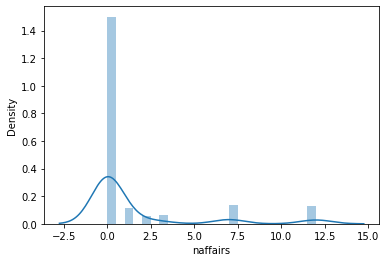

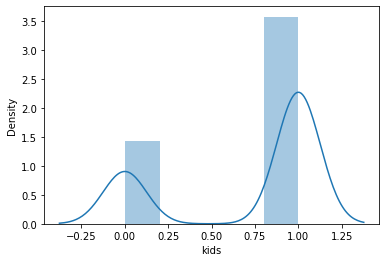

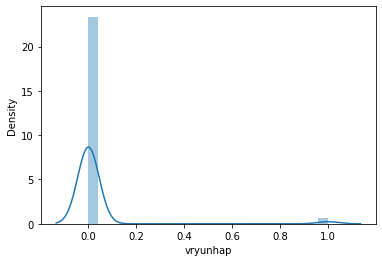

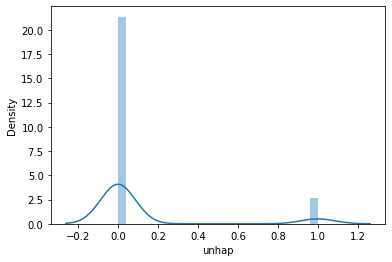

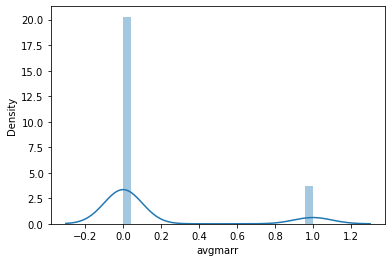

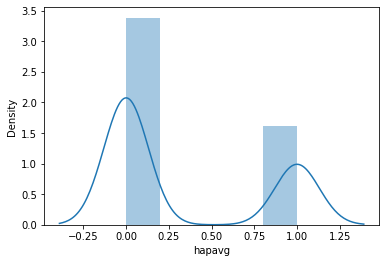

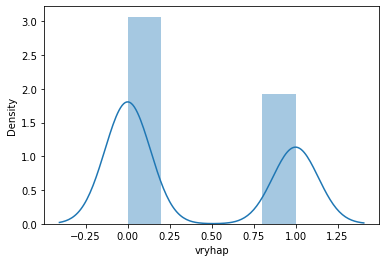

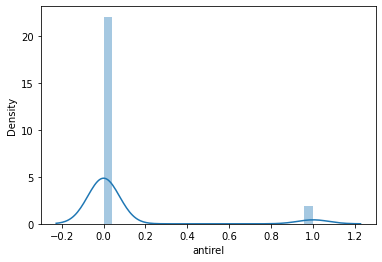

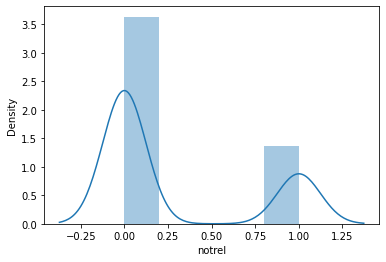

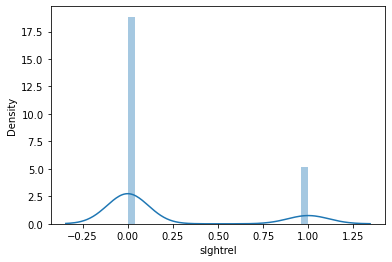

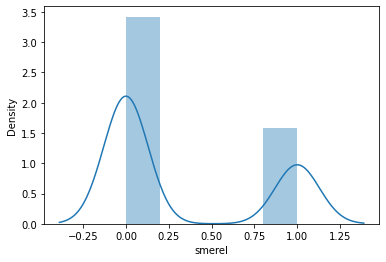

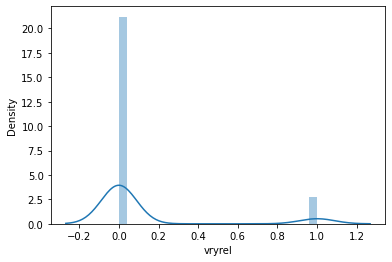

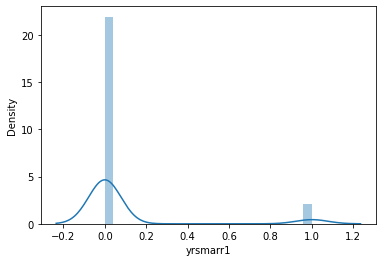

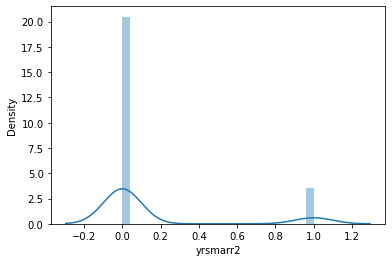

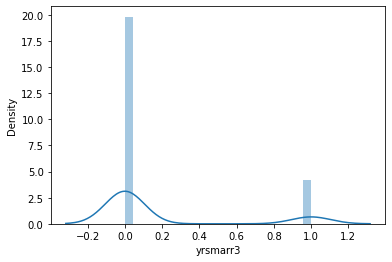

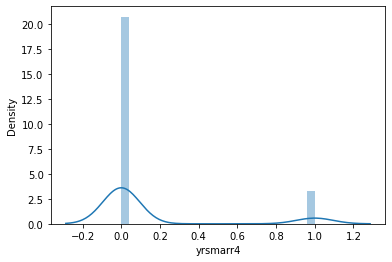

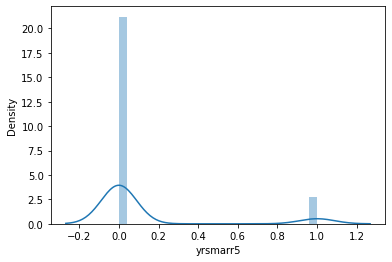

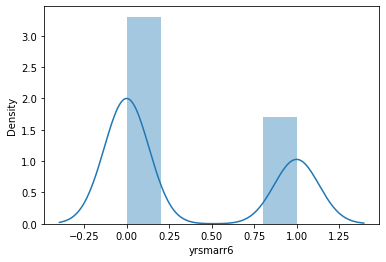

In [95]:
# Checking the Histograms

for i, col in enumerate(data.columns):
    plt.figure(i)
    sns.distplot(data[col])

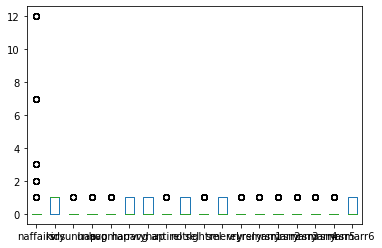

In [96]:
# Checking for Outliers by using boxplot 

data.plot(kind = 'box')

In [97]:
# These are the columns which have Outliers like 0 means no outliers, 1 means outliers

# 1. naffairs	  # 1
# 2. kids	      # 0
# 3. vryunhap   #	1
# 4. unhap	    # 1
# 5. avgmarr	  # 1
# 6. hapavg	    # 0
# 7. vryhap	    # 0
# 8. antirel	  # 1
# 9. notrel	    # 0
# 10. slghtrel	# 1
# 11. smerel	  # 0
# 12. vryrel	  # 1
# 13. yrsmarr1	# 1
# 14. yrsmarr2	# 1
# 15. yrsmarr3	# 1
# 16. yrsmarr4	# 1
# 17. yrsmarr5  # 1
# 18. yrsmarr6  # 0

In [98]:
# To Clean the outliers we import Winsorizer

!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


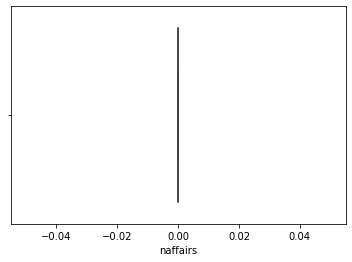

In [99]:
from feature_engine.outliers import Winsorizer

# naffairs
winsor_iqr = Winsorizer(capping_method = 'iqr',
                              tail = 'both',
                               fold = 1.5,
                                variables = ('naffairs'))

data_iqr = winsor_iqr.fit_transform(data[['naffairs']])

sns.boxplot(data_iqr['naffairs'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2796643f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2796675250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2796643950>],
 'medians': [<matplotlib.lines.Line2D at 0x7f279665e950>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f279665ecd0>],
 'means': []}

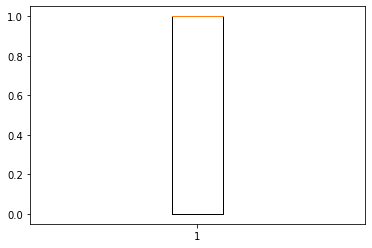

In [100]:
plt.boxplot(data['kids'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f279633e2d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f279633e690>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f279682a8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2796924f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2796924d10>],
 'means': []}

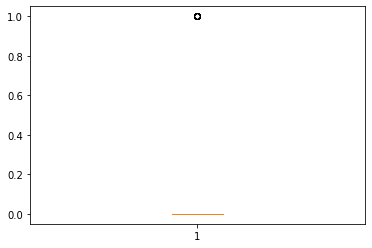

In [101]:
plt.boxplot(data['vryunhap'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


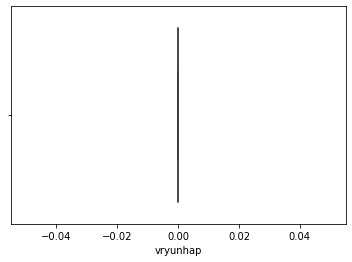

In [102]:
# vryunhap
winsor_iqr = Winsorizer(capping_method = 'iqr',
                              tail = 'both',
                               fold = 1.5,
                                variables = ('vryunhap'))

data_iqr = winsor_iqr.fit_transform(data[['vryunhap']])

sns.boxplot(data_iqr['vryunhap'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2796f251d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2796e884d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f27963ebb90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2796ae3210>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2796ae3650>],
 'means': []}

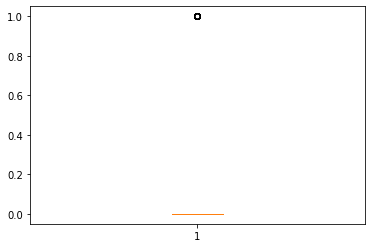

In [103]:
plt.boxplot(data['unhap'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


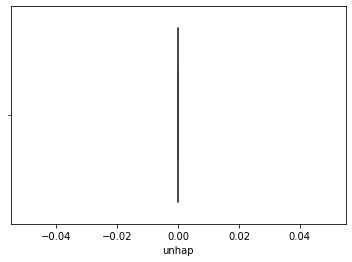

In [104]:
# unhap
winsor_iqr = Winsorizer(capping_method = 'iqr',
                              tail = 'both',
                               fold = 1.5,
                                variables = ('unhap'))

data_iqr = winsor_iqr.fit_transform(data[['unhap']])

sns.boxplot(data_iqr['unhap'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f2796332510>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2796332050>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f279635e610>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2796326810>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2796d86e90>],
 'means': []}

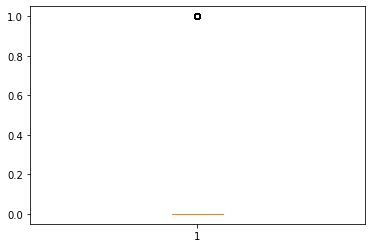

In [105]:
plt.boxplot(data['avgmarr'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


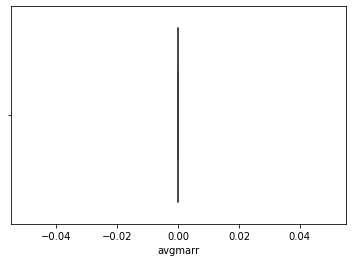

In [106]:
# avgmarr
winsor_iqr = Winsorizer(capping_method = 'iqr',
                              tail = 'both',
                               fold = 1.5,
                                variables = ('avgmarr'))

data_iqr = winsor_iqr.fit_transform(data[['avgmarr']])

sns.boxplot(data_iqr['avgmarr'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f2796592d10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f27965827d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2796592750>],
 'medians': [<matplotlib.lines.Line2D at 0x7f27965892d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2796589810>],
 'means': []}

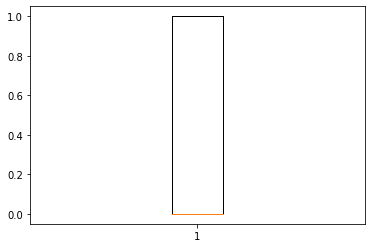

In [107]:
plt.boxplot(data['hapavg'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f27963b3090>,
 'caps': [<matplotlib.lines.Line2D at 0x7f27963b3b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f279639fa50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2796391610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2796391b50>],
 'means': []}

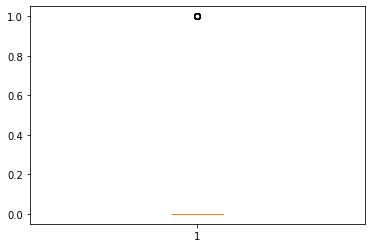

In [108]:
plt.boxplot(data['antirel'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


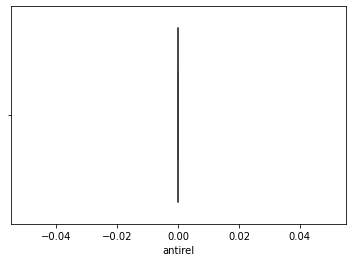

In [109]:
# antirel
winsor_iqr = Winsorizer(capping_method = 'iqr',
                              tail = 'both',
                               fold = 1.5,
                                variables = ('antirel'))

data_iqr = winsor_iqr.fit_transform(data[['antirel']])

sns.boxplot(data_iqr['antirel'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f279651eb90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f279652e650>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f279651e5d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2796512150>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2796512690>],
 'means': []}

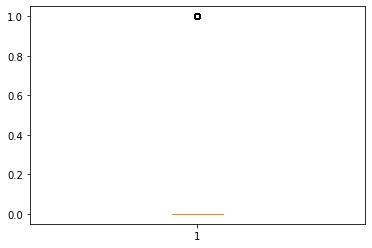

In [110]:
plt.boxplot(data['slghtrel'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


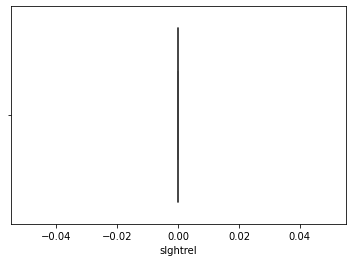

In [111]:
# slghtrel
winsor_iqr = Winsorizer(capping_method = 'iqr',
                              tail = 'both',
                               fold = 1.5,
                                variables = ('slghtrel'))

data_iqr = winsor_iqr.fit_transform(data[['slghtrel']])

sns.boxplot(data_iqr['slghtrel'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f2796e09a50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2796e11510>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2796e09450>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2796e11fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2796e28550>],
 'means': []}

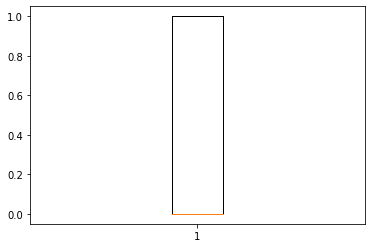

In [112]:
plt.boxplot(data['smerel'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f27963c4a10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f27963db4d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f27963c4450>],
 'medians': [<matplotlib.lines.Line2D at 0x7f27963dbf90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f27963f3510>],
 'means': []}

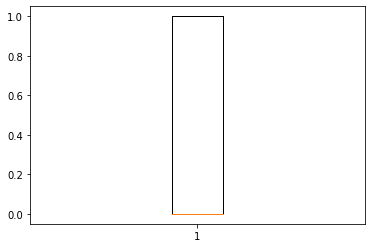

In [113]:
plt.boxplot(data['vryhap'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2796c49ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2796c4a790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2796c49090>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2796c76290>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2796c767d0>],
 'means': []}

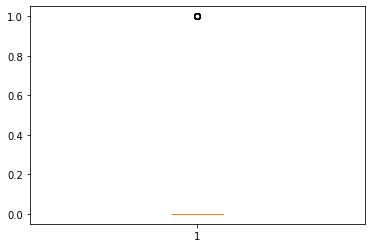

In [114]:
plt.boxplot(data['antirel'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


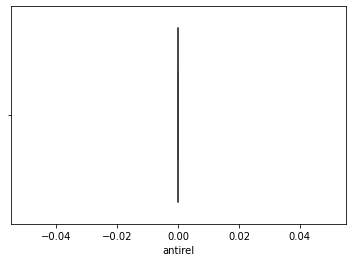

In [115]:
# antirel
winsor_iqr = Winsorizer(capping_method = 'iqr',
                              tail = 'both',
                               fold = 1.5,
                                variables = ('antirel'))

data_iqr = winsor_iqr.fit_transform(data[['antirel']])

sns.boxplot(data_iqr['antirel'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f2796e44990>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2796e49450>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2796e44390>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2796e49f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f27969f1490>],
 'means': []}

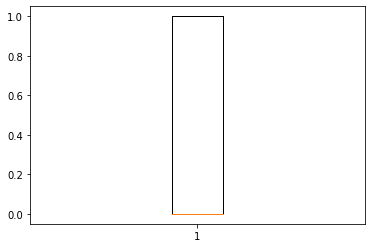

In [116]:
plt.boxplot(data['notrel'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2796831bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2796b87690>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2796831610>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2796bb4190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2796bb46d0>],
 'means': []}

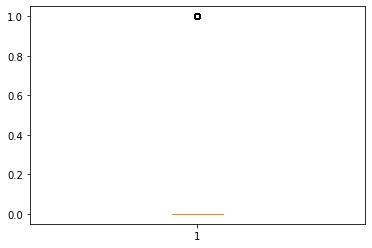

In [117]:
plt.boxplot(data['slghtrel'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


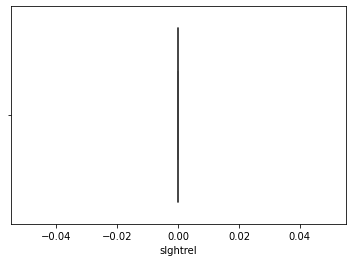

In [118]:
# slghtrel
winsor_iqr = Winsorizer(capping_method = 'iqr',
                              tail = 'both',
                               fold = 1.5,
                                variables = ('slghtrel'))

data_iqr = winsor_iqr.fit_transform(data[['slghtrel']])

sns.boxplot(data_iqr['slghtrel'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f2796bd17d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f27967c4290>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2796bd11d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f27967c4d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f27967f1290>],
 'means': []}

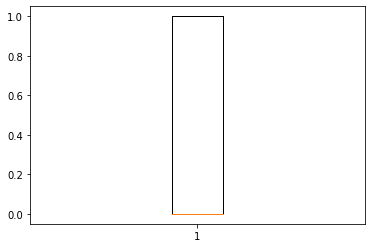

In [119]:
plt.boxplot(data['smerel'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2796d10dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2796992810>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2796d10810>],
 'medians': [<matplotlib.lines.Line2D at 0x7f27969b9390>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f27969b98d0>],
 'means': []}

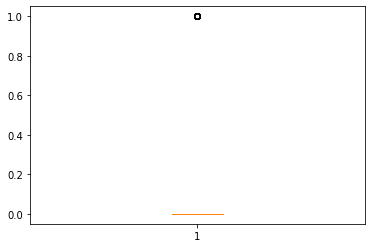

In [120]:
plt.boxplot(data['vryrel'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


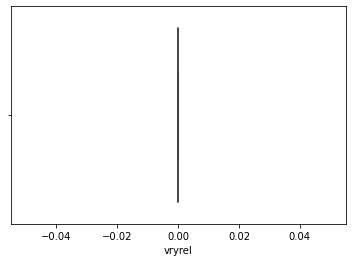

In [121]:
# vryrel
winsor_iqr = Winsorizer(capping_method = 'iqr',
                              tail = 'both',
                               fold = 1.5,
                                variables = ('vryrel'))

data_iqr = winsor_iqr.fit_transform(data[['vryrel']])

sns.boxplot(data_iqr['vryrel'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f279668da90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f27966a4550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f279668d4d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2796696050>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2796696590>],
 'means': []}

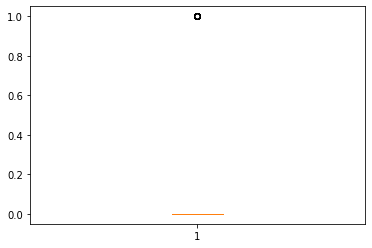

In [122]:
plt.boxplot(data['yrsmarr1'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


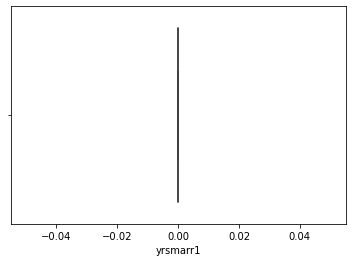

In [123]:
# yrsmarr1
winsor_iqr = Winsorizer(capping_method = 'iqr',
                              tail = 'both',
                               fold = 1.5,
                                variables = ('yrsmarr1'))

data_iqr = winsor_iqr.fit_transform(data[['yrsmarr1']])

sns.boxplot(data_iqr['yrsmarr1'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f2796cd43d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2796cd4e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2796cc5dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2796cfa950>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2796cfae90>],
 'means': []}

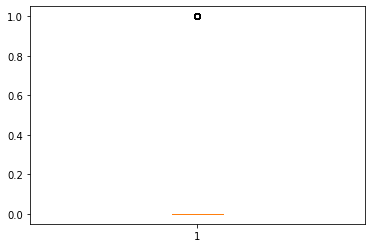

In [124]:
plt.boxplot(data['yrsmarr2'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


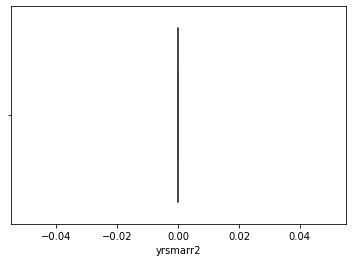

In [125]:
# yrsmarr2
winsor_iqr = Winsorizer(capping_method = 'iqr',
                              tail = 'both',
                               fold = 1.5,
                                variables = ('yrsmarr2'))

data_iqr = winsor_iqr.fit_transform(data[['yrsmarr2']])

sns.boxplot(data_iqr['yrsmarr2'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f2796373c90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2796b70310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f27963f7a10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f27963be8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f27963fa310>],
 'means': []}

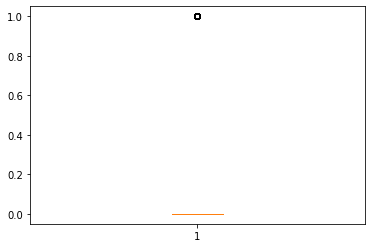

In [126]:
plt.boxplot(data['yrsmarr3'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


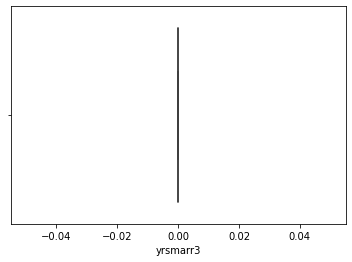

In [127]:
# yrsmarr3
winsor_iqr = Winsorizer(capping_method = 'iqr',
                              tail = 'both',
                               fold = 1.5,
                                variables = ('yrsmarr3'))

data_iqr = winsor_iqr.fit_transform(data[['yrsmarr3']])

sns.boxplot(data_iqr['yrsmarr3'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f2796069550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2796069fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f279676cf50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2796071ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f279607a050>],
 'means': []}

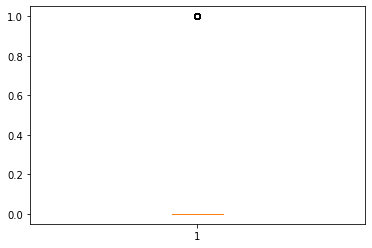

In [128]:
plt.boxplot(data['yrsmarr4'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


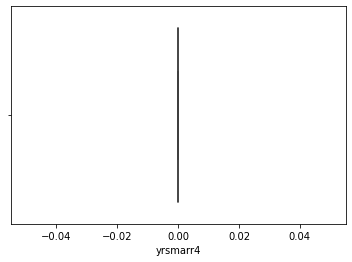

In [129]:
# yrsmarr4
winsor_iqr = Winsorizer(capping_method = 'iqr',
                              tail = 'both',
                               fold = 1.5,
                                variables = ('yrsmarr4'))

data_iqr = winsor_iqr.fit_transform(data[['yrsmarr4']])

sns.boxplot(data_iqr['yrsmarr4'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f2795f48490>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2795f48f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2795f42e50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2795f4ea10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2795f4ef50>],
 'means': []}

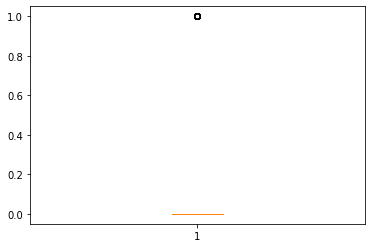

In [130]:
plt.boxplot(data['yrsmarr5'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


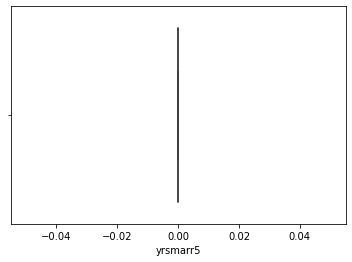

In [131]:
# yrsmarr5
winsor_iqr = Winsorizer(capping_method = 'iqr',
                              tail = 'both',
                               fold = 1.5,
                                variables = ('yrsmarr5'))

data_iqr = winsor_iqr.fit_transform(data[['yrsmarr5']])

sns.boxplot(data_iqr['yrsmarr5'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f2795e9fed0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2795ea3990>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2795e9f910>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2795eab490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2795eab9d0>],
 'means': []}

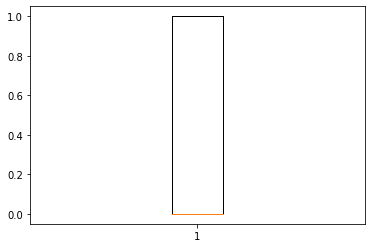

In [132]:
plt.boxplot(data['yrsmarr6'])

In [133]:
# Checking the duplicates

duplicates = data.duplicated()
sum(duplicates)

336

In [134]:
duplicates =  data.drop_duplicates(keep = False)

In [135]:
duplicates.duplicated().sum()

0

In [136]:
# Checking for Zero variance

data.var() == 0

naffairs    False
kids        False
vryunhap    False
unhap       False
avgmarr     False
hapavg      False
vryhap      False
antirel     False
notrel      False
slghtrel    False
smerel      False
vryrel      False
yrsmarr1    False
yrsmarr2    False
yrsmarr3    False
yrsmarr4    False
yrsmarr5    False
yrsmarr6    False
dtype: bool

In [137]:
# Checking the Missing Values

data.isna().sum()

naffairs    0
kids        0
vryunhap    0
unhap       0
avgmarr     0
hapavg      0
vryhap      0
antirel     0
notrel      0
slghtrel    0
smerel      0
vryrel      0
yrsmarr1    0
yrsmarr2    0
yrsmarr3    0
yrsmarr4    0
yrsmarr5    0
yrsmarr6    0
dtype: int64

In [138]:
# Binarization - Discritization 

data['naffairs'] = (data['naffairs'] > 0).astype(int)

In [139]:
data

,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
597,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
598,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
599,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [140]:
# no need for Transformation, because there are only one's and zeros so we get only two lines in plot

In [141]:
# Standardization using Scaler mean min = 0, max = 1

data.describe()

,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,0.249584,0.715474,0.026622,0.109817,0.154742,0.322795,0.386023,0.079867,0.272879,0.214642,0.316140,0.116473,0.086522,0.146423,0.174709,0.136439,0.116473,0.339434
std,0.433133,0.451564,0.161111,0.312922,0.361960,0.467935,0.487242,0.271313,0.445810,0.410916,0.465355,0.321058,0.281368,0.353824,0.380034,0.343540,0.321058,0.473912
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [142]:
def norm_fun(i):
  x = (i - i.min())/(i.max() - i.min())

  return x

In [143]:
data_norm = norm_fun(data)
data = pd.DataFrame(data_norm)
data.describe()

,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,0.249584,0.715474,0.026622,0.109817,0.154742,0.322795,0.386023,0.079867,0.272879,0.214642,0.316140,0.116473,0.086522,0.146423,0.174709,0.136439,0.116473,0.339434
std,0.433133,0.451564,0.161111,0.312922,0.361960,0.467935,0.487242,0.271313,0.445810,0.410916,0.465355,0.321058,0.281368,0.353824,0.380034,0.343540,0.321058,0.473912
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [144]:
# Checking the Correaltion

data.corr()

,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
naffairs,1.000000,0.133605,0.095694,0.203235,0.040277,-0.003448,-0.188775,0.113744,0.000589,0.101169,-0.119244,-0.053584,-0.109111,-0.108355,0.008036,0.028384,0.042297,0.090004
kids,0.133605,1.000000,0.035564,0.127133,0.025094,0.119876,-0.227176,-0.045474,-0.110424,0.015304,0.071857,0.068019,-0.369977,-0.427288,-0.059484,0.132481,0.148491,0.389742
vryunhap,0.095694,0.035564,1.000000,-0.058087,-0.070761,-0.114179,-0.131133,-0.010595,0.014710,0.014242,-0.023525,0.004396,-0.050898,-0.068496,-0.021650,-0.005511,-0.060046,0.143393
unhap,0.203235,0.127133,-0.058087,1.000000,-0.150281,-0.242493,-0.278500,-0.044586,0.071563,0.023767,-0.044239,-0.027989,-0.089167,-0.025047,-0.091528,0.108448,-0.044579,0.096623
avgmarr,0.040277,0.025094,-0.070761,-0.150281,1.000000,-0.295402,-0.339266,-0.041200,-0.003901,0.022840,0.005927,0.002410,0.015602,-0.047075,-0.015120,0.004170,0.002410,0.033352
hapavg,-0.003448,0.119876,-0.114179,-0.242493,-0.295402,1.000000,-0.547437,0.019768,-0.015487,-0.005553,0.020427,-0.017702,-0.022600,-0.124884,0.010370,-0.015233,0.071048,0.061251
vryhap,-0.188775,-0.227176,-0.131133,-0.278500,-0.339266,-0.547437,1.000000,0.043760,-0.033053,-0.031608,0.012169,0.031732,0.084210,0.193641,0.067214,-0.056296,-0.021539,-0.193068
antirel,0.113744,-0.045474,-0.010595,-0.044586,-0.041200,0.019768,0.043760,1.000000,-0.180484,-0.154022,-0.200315,-0.106969,-0.003342,-0.000491,0.123074,-0.027700,-0.030435,-0.055645
notrel,0.000589,-0.110424,0.014710,0.071563,-0.003901,-0.015487,-0.033053,-0.180484,1.000000,-0.320262,-0.416521,-0.222425,0.063914,0.126652,-0.016254,0.017672,0.022107,-0.147259
slghtrel,0.101169,0.015304,0.014242,0.023767,0.022840,-0.005553,-0.031608,-0.154022,-0.320262,1.000000,-0.355451,-0.189813,-0.016742,0.012741,0.079645,-0.030705,-0.025582,-0.023853


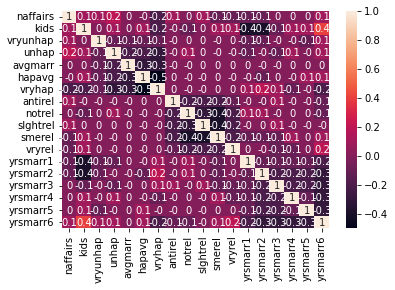

In [145]:
# Heat Map

corr_mat = data.corr().round(1)
sns.heatmap(data = corr_mat, annot = True)

In [146]:
# Spliting the data

X = data.drop(columns=['naffairs'])
Y = data.naffairs

In [147]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [148]:
# Model Building

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [149]:
y_pred = model.predict(x_test)

In [150]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred) # 80% accuracy is pretty good.

[[137   2]
 [ 34   8]]


0.8011049723756906

In [151]:
# what percentage had affairs?
Y.mean()

0.24958402662229617

In [152]:
# examine the coefficients
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,kids,[-0.060102946924497816]
1,vryunhap,[0.31194681043173256]
2,unhap,[0.6637155307393432]
3,avgmarr,[-0.031099695533183085]
4,hapavg,[-0.24348705394817702]
5,vryhap,[-0.7011384221116587]
6,antirel,[0.8655667203085474]
7,notrel,[0.016127817372639176]
8,slghtrel,[0.18127019579492326]
9,smerel,[-0.5859534001984468]


In [155]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

model2 = LogisticRegression()
model2.fit(x_train_scaled, y_train)

y_pred2 = model2.predict(x_test_scaled)

cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
accuracy_score(y_test, y_pred2)

[[136   3]
 [ 34   8]]


0.7955801104972375

In [157]:
## K-fold cross validation
score = cross_val_score(model, X, Y, scoring='accuracy', cv = 10)
print(score)
print(score.mean())

[0.7704918  0.73333333 0.75       0.75       0.78333333 0.73333333
 0.76666667 0.8        0.7        0.76666667]
0.7553825136612022
